<a href="https://colab.research.google.com/github/TanakaDopora/AI/blob/main/AI_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Question 0**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_1 = pd.read_csv('/content/drive/My Drive/AI Assignment 2/datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn (1).csv')

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for column in df_1.columns:
  if df_1[column].dtype == np.number:
    continue
  df_1[column] = encoder.fit_transform(df_1[column])

df_1.corr()['Churn']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  """


customerID         -0.017447
gender             -0.008612
SeniorCitizen       0.150889
Partner            -0.150448
Dependents         -0.164221
tenure             -0.352229
PhoneService        0.011942
MultipleLines       0.038037
InternetService    -0.047291
OnlineSecurity     -0.289309
OnlineBackup       -0.195525
DeviceProtection   -0.178134
TechSupport        -0.282492
StreamingTV        -0.036581
StreamingMovies    -0.038492
Contract           -0.396713
PaperlessBilling    0.191825
PaymentMethod       0.107062
MonthlyCharges      0.193356
TotalCharges        0.014479
Churn               1.000000
Name: Churn, dtype: float64

# **Question 1**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

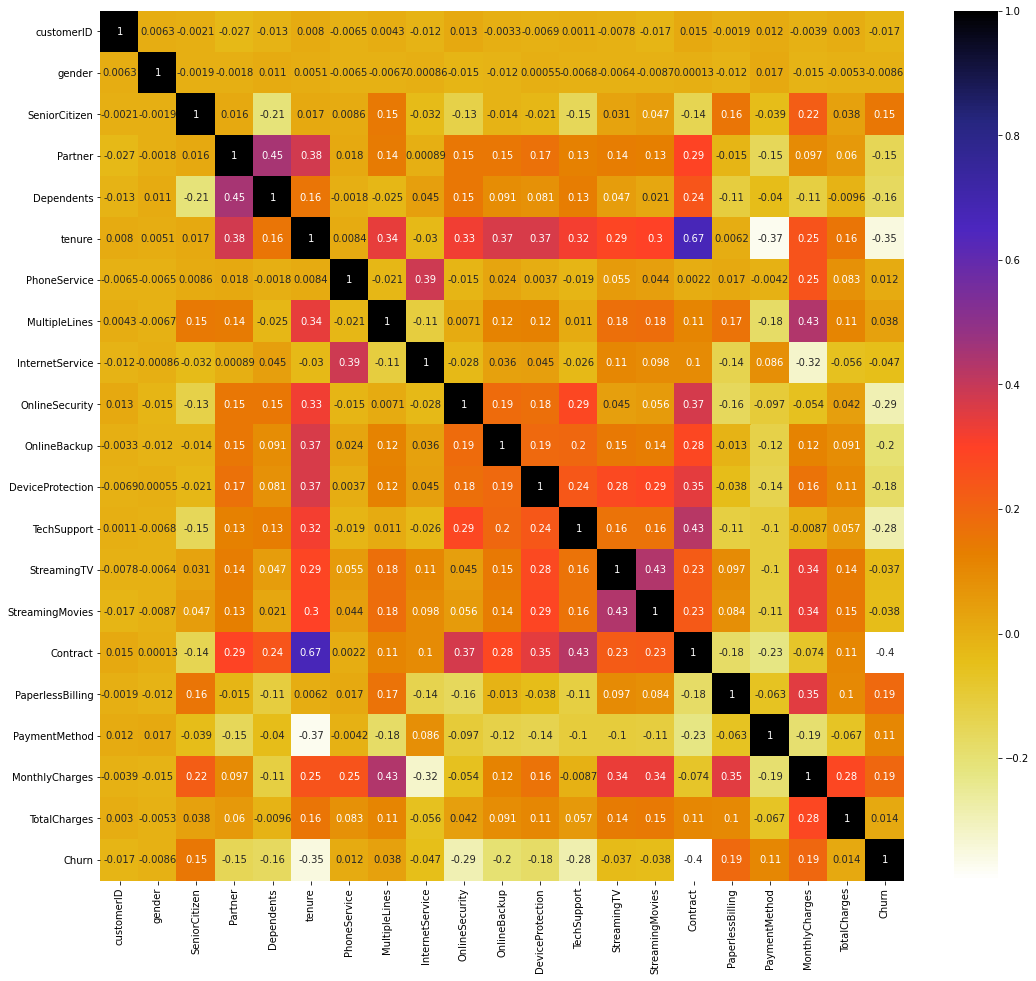

In [ ]:
plt.figure(figsize=(18,16))
cor = df_1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if (corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [ ]:
corr_features = correlation(cor, 0.6)
len(set(corr_features))

7

In [ ]:
corr_features

{'Contract',
 'Dependents',
 'DeviceProtection',
 'MonthlyCharges',
 'OnlineBackup',
 'StreamingMovies',
 'TechSupport'}

# **Question 2**

Extreme Gradient Boosting (XGBoost) is a fast and efficient implementation of gradient boosted decision trees that can be used for regression predictive modeling.

In [ ]:
cols_to_use = ['Contract', 'Dependents', 'DeviceProtection', 'MonthlyCharges', 'OnlineBackup', 'StreamingMovies', 'TechSupport']
X = df_1[cols_to_use]

# Selected target
y = df_1.Churn

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

In [ ]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model.fit(Xtrain, ytrain)

[20:32:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)